# Supervised Learning 

- It is a type of ML where algorithm learns from labeled data, consisting of input-output pairs
- You train the algo on a dataset that includes input features and corresponding correct output labels
- Goal for algo is to learn mapping or relationship between input features and output labels
- This enables it to make Predictions or Decisions on new, unseen data


## Supervised Learning Categories

- There are 2 categories based on 'type of target variable' : 
    - `Regression` --> continuous
    - `Classification` --> categorical

#### Classification 
- When the target variable is categorical, the prediction task is Classification.
- Eg: predicting whether an email is spam or not , based on its contents, sender info, subject line --> think of it like sorting mail into different boxes labeled 'spam' & 'not spam'
    

#### Regression 
- When the target variable is continuous, the prediction task is Regression
- Eg: predicting price of a house given its location, size, no.of bedrooms, age, etc - like a real estate agent would 

![](https://media.licdn.com/dms/image/v2/D5612AQHleCueKC_lww/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1677785069046?e=1769644800&v=beta&t=VFlIjSqcHpGraxoBC0wzatOkFqDtXy2tbQsB_oJ5fPU)

Regression: 
- Purpose: Predict a continuous value
- Eg: Predicting exact temperature for tomorrow
- Visualization: A thermometer scale ranging from -50F to 170F with indicator pointing to 84F
- Question Addressed: "What will be the temperature tomorrow ?"
- Output: A specific temperature value (eg: 84F)

Classification:
- Purpose: Predict a categorical outcome
- Eg: Predicting whether tomorrow will be hot or cold
- Visualization: A thermometer scale divided into 2 colored regions: blue for cold & red for hot , with a threshold separating them
- Question Addressed: "Will it be hot or cold tomorrow ?"
- Output: A category (eg: "cold" or "hot")

## Applications of Supervised Learning  

It can optimize and automate processes like:
- HR operations = to find good candidates, this also improve its ability to recommend similar profiles in future 
- Finance = automate loan approval & improve loan risk assesment, it can predict likelihood of a loan being repaid (using historical loan data)
- Emails = distingusish between span and non-spam emails 
- Manufacturing = used to inspect quality and classify products into different grades eg: to check defects in products and ensure they meet quality standards
- Maritime Industry = forecasting combines historical events and weather conditions to develop precautionary incident management, regression models can predict tidal currents and forecast supply and demand using past data
- Fraud Protection = models can help detect and prevent fraud 

## Supervised Learning Algorithm

Algorithm = specific method or approach used to train a model on data 

- ML algorithms can be divided into categories based on Learning Styles, Purpose, Type of problem they are designed to solve 

- Below are some commonly used `Supervised Learning Algorithms`:
    - Linear Regression
    - Logistic Regression
    - Naive Bayes
    - K-Nearest Neighbors (KNN)
    - Decision Trees 
    - Random Forests 
    - Support Vector Machines (SVM)

# Hello World of ML ==> the Titanic Dataset

## Preprocessing Data for Machine Learning 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [106]:
df = pd.read_csv("/home/vinayakgaur07/Downloads/Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Names,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **1. `EDA`** --  Exploratory Data Analysis

##### What to do in EDA:

- a) Basic Overview

    - head(), tail()
    - shape()
    - dtypes()
    - columns()
    - value_counts()

- b) Target Variable Analysis

    - Identify target variable
    - Distribution of target

- c) Missing Values

    - isna(), sum()
    - drop or impute
    - understand missing patterns

- d) Separate Features

    - Numerical features
    - Categorical features

- e) Data Visualization

    - Distribution of numerical features
    - Frequency of categorical features
    - Outliers (boxplots)

- f) Feature Relationships

    - Feature vs Target
    - Feature vs Feature (correlation)

> Basic Overview:

In [107]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Names           object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [108]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Names', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

> Separating Numerical & Categorical Columns:

In [109]:
categorical_columns = ['Sex', 'Survived', 'Cabin', 'Pclass', 'Embarked', 'Name', 'Ticket']  #alphanumeric('ticket') is Categorical, Name  --> we cannot do mathematical operations on categorical things(like we cannot take avg of tickets)  
numerical_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

> To check for missing values (NaN) in the dataset --> isna():

In [110]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Names           0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          41
Embarked        0
dtype: int64

- We have missing values in Cabin
- Handling missing values (Imputation):
    - Cabin = 'giving `Missing` as Label'
- Now 'Cabin' is a Categorical column therefore we have foll imputation techniques for it :
    - Mode
    - giving 'Missing' as label
    - Arbitrary

- We cannot take mode value for cabin cuz it is unique for all individuals and we also cannot assign arbitrary values therefore we choose = giving 'Missing' as label

In [111]:
df.isna().sum()/len(df)     #to get percentages/ratio of nulls

PassengerId    0.00
Survived       0.00
Pclass         0.00
Names          0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.82
Embarked       0.00
dtype: float64

> Therefore, 82% of cabin values are Nulls 
- So if we used 'missing' -> NOT useful 
- So instead, we drop the column

> NOTE:If you have a high ratio (around 30% and above) of missing values, its better to drop the column than using imputation cuz that distortes   the data as it can cause huge effect  

In [112]:
df.dropna()

,PassengerId,Survived,Pclass,Names,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,45.5,1,0,PC 17569,146.5208,B78,C


> Data Visualization:

<Axes: ylabel='Pclass'>

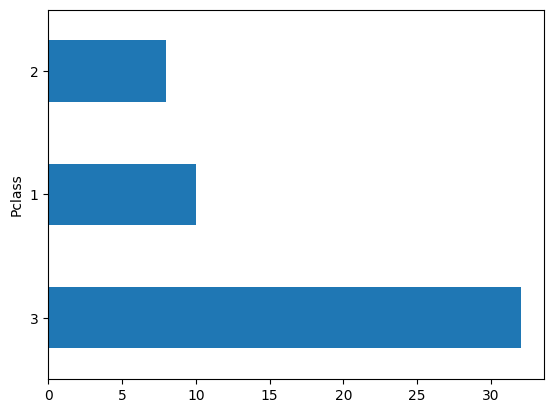

In [113]:
# for 'Pclass':
df['Pclass'].value_counts().plot(kind='barh')

Therefore, most passengers had 3rd class tickets

<Axes: ylabel='SibSp'>

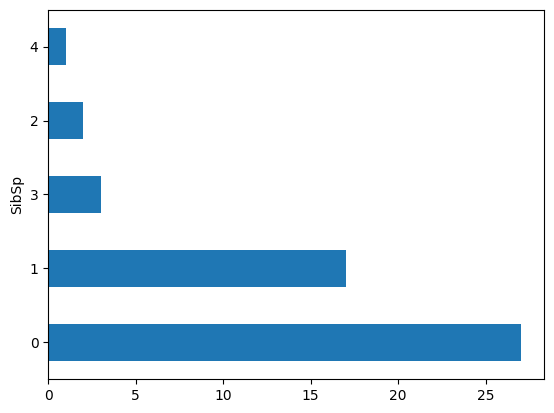

In [114]:
# for 'SibSp':
df['SibSp'].value_counts().plot(kind='barh')


Therefore, Most passengers were travelling Alone

#### Fair vs Class Comparision

In [115]:
df.groupby('Pclass')[['Fare']].agg(['min', 'max', 'mean', 'median'])       #note: the double braces

Fare                            
           min       max       mean median
Pclass                                    
1       26.550  263.0000  80.970820  52.55
2       10.500   41.5792  21.393750  18.50
3        7.225   31.3875  12.934769   8.05

- Max prices could be even passengers booked thier tickets at last minute 
- As expected, mean and median of 1st class is higher than other classes
- Data is skewed, cuz median is not close to mean. Median < Mean therefore positively skewed  

Is there a significance to port of embarkation

<Axes: xlabel='Embarked', ylabel='count'>

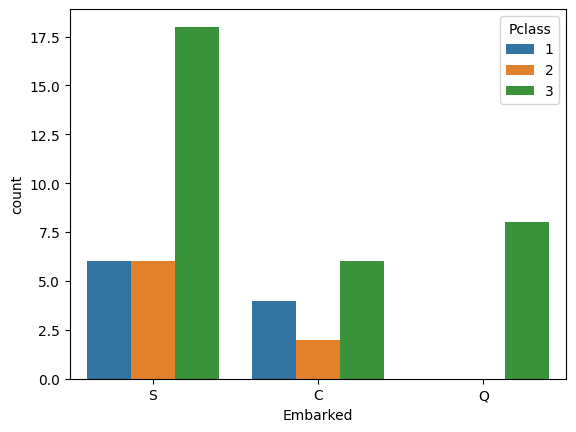

In [116]:
sns.countplot(data=df, x='Embarked', hue='Pclass', palette='tab10')

- Most of the passengers embarked from S
- Port C is the only port where we see higher class 1 ratio than others
- Almost no passenger from 1st and 2nd class embarked from Q port(compared to 3rd class)


Get Ratio of survived for each port 

When you have a 0/1 indicator, taking avg means - counting 1s and dividing by all instances. Same as calculation of ratio

In [117]:
df.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.583333
Q,0.625000
S,0.333333


Port Q survival ratio is the highest, where it has the highest ratio of class 3 passengers cuz they are more in numbers too so probability of survival increases

#### Inspect Common Knowledge About The Titanic 
We know that most women, children, older people were prioritized to use safe boats 

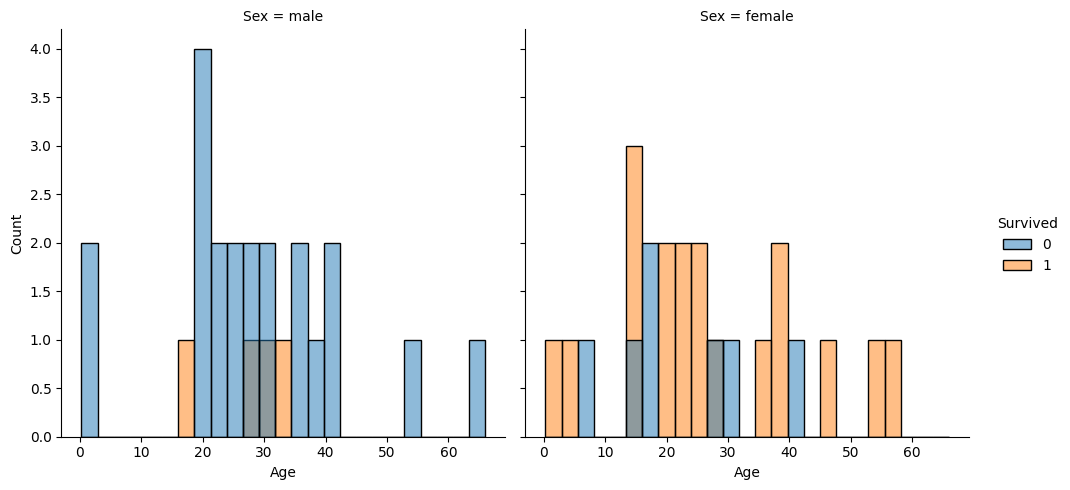

In [118]:
sns.displot(data=df, x='Age', col='Sex', hue='Survived', bins=25)

- Viz above confirms our initial thoughts and what we know about Titanic Catastrophe:
    - Higher ratio of women that survived than men 
    - Even in male, we see a spike in lower(children) and higher(older people) age bands 

Get the ratio of the children(below 12 years) that survived 

In [119]:
df_children = df[df['Age'] <= 12]

df_children['Survived'].mean()

0.4

In [120]:
#OR
df[df['Age'] <= 12]['Survived'].mean()


0.4

## **`Preprocessing & Feature Engineering Stages`**

- **Stage 1**: Data Cleaning
    1. Impuatation
    2. Data Quality & Outliers Treatment
    3. Encoding
    4. Feature Selection (dropping unnecessary features/columns)
    5. Feature Extraction: (extracting/creating new features/columns using existing ones)
        - Family Size Indicator/Column/Feature
        - Alone Indicator/Column/Feature
        - Child Indicator/Column/Feature
        - Age Bands Indicator/Column/Feature
        - Married Female Indicator/Column/Feature
        - No Fare Indicator/Column/Feature

- **Stage 2**: 
    1. Split the data into X(features --> indepenedent) & y(target --> dependent)
    2. Scaling
    3. Split data into Train and Test (gives 4 segements = X train, Y train, X test, Y test)

- After this we go for **Model Building** 

### **1. `Imputation`** -- filling missing values in a dataset instead of deleting the data

In [121]:
cols_with_nulls = df.columns[df.isna().sum()>0]             #this gives columns with Nulls
cols_with_nulls

Index(['Cabin'], dtype='object')

In [122]:
df.drop(columns='Cabin', axis=1, inplace=True)
df.columns      #so 'Cabin' got removed 
#cabin had more than 30% values missing 

Index(['PassengerId', 'Survived', 'Pclass', 'Names', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [123]:
df.drop(columns='Ticket', axis=1, inplace=True)     #cuz it is categorical and will not help 

Extracting 'Master' prefix from names -- used for children

In [124]:
df['Names'].str.split(',')

0                            [Braund,  Mr. Owen Harris]
1     [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                             [Heikkinen,  Miss. Laina]
3       [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                           [Allen,  Mr. William Henry]
5                                   [Moran,  Mr. James]
6                            [McCarthy,  Mr. Timothy J]
7                     [Palsson,  Master. Gosta Leonard]
8     [Johnson,  Mrs. Oscar W (Elisabeth Vilhelmina ...
9                [Nasser,  Mrs. Nicholas (Adele Achem)]
10                   [Sandstrom,  Miss. Marguerite Rut]
11                          [Bonnell,  Miss. Elizabeth]
12                    [Saundercock,  Mr. William Henry]
13                       [Andersson,  Mr. Anders Johan]
14              [Vestrom,  Miss. Hulda Amanda Adolfina]
15                  [Hewlett,  Mrs. (Mary D Kingcome) ]
16                              [Rice,  Master. Eugene]
17                      [Williams,  Mr. Charles 

In [125]:
df['Names'].str.split(',').str[1]


0                                       Mr. Owen Harris
1            Mrs. John Bradley (Florence Briggs Thayer)
2                                           Miss. Laina
3                    Mrs. Jacques Heath (Lily May Peel)
4                                     Mr. William Henry
5                                             Mr. James
6                                         Mr. Timothy J
7                                 Master. Gosta Leonard
8              Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                           Mrs. Nicholas (Adele Achem)
10                                 Miss. Marguerite Rut
11                                      Miss. Elizabeth
12                                    Mr. William Henry
13                                     Mr. Anders Johan
14                          Miss. Hulda Amanda Adolfina
15                              Mrs. (Mary D Kingcome) 
16                                       Master. Eugene
17                                   Mr. Charles

In [126]:
df['Names'].str.split(',').str[1].str.split('.')


0                                   [ Mr,  Owen Harris]
1        [ Mrs,  John Bradley (Florence Briggs Thayer)]
2                                       [ Miss,  Laina]
3                [ Mrs,  Jacques Heath (Lily May Peel)]
4                                 [ Mr,  William Henry]
5                                         [ Mr,  James]
6                                     [ Mr,  Timothy J]
7                             [ Master,  Gosta Leonard]
8          [ Mrs,  Oscar W (Elisabeth Vilhelmina Berg)]
9                       [ Mrs,  Nicholas (Adele Achem)]
10                             [ Miss,  Marguerite Rut]
11                                  [ Miss,  Elizabeth]
12                                [ Mr,  William Henry]
13                                 [ Mr,  Anders Johan]
14                      [ Miss,  Hulda Amanda Adolfina]
15                          [ Mrs,  (Mary D Kingcome) ]
16                                   [ Master,  Eugene]
17                               [ Mr,  Charles 

In [127]:
df['Names'].str.split(',').str[1].str.split('.').str[0]


0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
30        Don
31        Mrs
32       Miss
33         Mr
34         Mr
35         Mr
36         Mr
37         Mr
38       Miss
39       Miss
40        Mrs
41        Mrs
42         Mr
43       Miss
44       Miss
45         Mr
46         Mr
47       Miss
48         Mr
49        Mrs
Name: Names, dtype: object

(OR) 
- by using `contains()` func of string module 
- It gives all those strings that contain 'Master' string from column 'Names'

In [128]:
df[df['Names'].str.contains('Master')]

,PassengerId,Survived,Pclass,Names,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.075,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.125,Q


In [129]:
df['Title'] = df['Names'].str.split(',').str[1].str.split('.').str[0]
df['Title'].value_counts()

Title
Mr        22
Miss      13
Mrs       12
Master     2
Don        1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

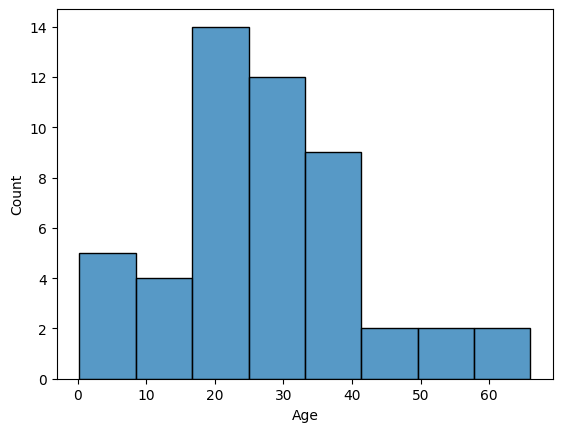

In [130]:
sns.histplot(df['Age'])

>It is always recommended to check the distribution of the column before and after imputation. Look for impact on skewness

### **`Feature Selection`** --> process of selecting a subset of relevant features from the original feature set
- Choosing the most important features from the existing ones.

- 👉 You keep original features
- 👉 You remove irrelevant/redundant ones

In [131]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Names', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')

There are some columns we didnt needed like - PassengerId, Name, Title 

In [132]:
df.drop(columns=['PassengerId', 'Names', 'Title'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### **`Encoding`**  --> converting categorical (text) data into numerical form

- Sex: Label Encoding 
- Embarked: One-hot encoding   --> `df.get_dummies(df, cols=, dtype=)`
- Title: One-hot encoding

- Label Encoding:
    - Pandas: `pd.factorize(df["column"])`
    - Scikit-learn:  `LabelEncoder().fit_transform(df["column"])`     (from sklearn.preprocessing import LabelEncoder)

- Ordinal Encoding: 
    - Pandas: `df["column"].map({v: i for i, v in enumerate(order)})`
    - Scikit-learn: `OrdinalEncoder(categories=[["low", "medium", "high"]]).fit_transform(df[["column"]])`    (from sklearn.preprocessing import OrdinalEncoder)

- One-Hot Encoding:
    - Pandas:   `pd.get_dummies(df, columns=["columns"])`
    - Scikit-learn: `OneHotEncoder(sparse_output=False).fit_transform(df[["columns"]])`   (from sklearn.preprocessing import OneHotEncoder)

- Label → `factorize` / `LabelEncoder`

- Ordinal → `map` / `OrdinalEncoder`

- One-Hot → `get_dummies` / `OneHotEncoder`

In [133]:
#Label Encoding:
df['Sex'] = pd.factorize(df['Sex'])[0]          #factorize give 0 or 1 to sex           
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


> use get_dummies() func for One Hot Encoding

In [134]:
#One-hot Encoding:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


### **`Feature Extraction `** --> transforms original features into a new feature space

- Creating new features by transforming or combining existing ones.

- 👉 Original features are not kept as-is
- 👉 New features are generated


Generating age bands/ranges/column/feature:

In [135]:
df['Age'].max(), df['Age'].min()       # to get upper & lower bound of 'Age' values

(66.0, 0.25)

In [136]:
my_bins = [0,12,19,40,61]
df['AgeBin'] = pd.cut(df['Age'], bins = my_bins)        #arrange 'Age' into these user bins 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin
0,0,3,0,22.0,1,0,7.2500,0,0,1,"(19, 40]"
1,1,1,1,38.0,1,0,71.2833,1,0,0,"(19, 40]"
2,1,3,1,26.0,0,0,7.9250,0,0,1,"(19, 40]"
3,1,1,1,35.0,1,0,53.1000,0,0,1,"(19, 40]"
4,0,3,0,35.0,0,0,8.0500,0,0,1,"(19, 40]"


Lets also apply encoding for the intervals : 
- 0 = (0-12)
- 1 = (12-19)
- 2 = (19-40)
- 3 = (40-61)

In [137]:
my_bins = [0,12,19,40,67]

#lets also apply encoding for the intervals : ordinal encoding

df['AgeBin'] = pd.cut(df['Age'], bins = my_bins, labels = [0,1,2,3])    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin
0,0,3,0,22.0,1,0,7.2500,0,0,1,2
1,1,1,1,38.0,1,0,71.2833,1,0,0,2
2,1,3,1,26.0,0,0,7.9250,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,0,0,1,2


> so here, we created a new column/feature from exisiting ones -- feature extraction

Building family size indicator/column/feature:

In [138]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize
0,0,3,0,22.0,1,0,7.2500,0,0,1,2,2
1,1,1,1,38.0,1,0,71.2833,1,0,0,2,2
2,1,3,1,26.0,0,0,7.9250,0,0,1,2,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2,2
4,0,3,0,35.0,0,0,8.0500,0,0,1,2,1


> here we created, a new column/feature 'FamilySize' combining SibSp & Parch --> this is also feature extraction 

Build travelling alone indicator/feature/column:

In [139]:
df['IsAlone'] = (df['FamilySize'] == 1)     #filter: those with (FamilySize == 1) are travelling alone
df.head()

# this filter returns -- BOOLEAN (True & False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,0,0,1,2,2,False
1,1,1,1,38.0,1,0,71.2833,1,0,0,2,2,False
2,1,3,1,26.0,0,0,7.9250,0,0,1,2,1,True
3,1,1,1,35.0,1,0,53.1000,0,0,1,2,2,False
4,0,3,0,35.0,0,0,8.0500,0,0,1,2,1,True


Use **astype(int)** to get 1(True) & 0(False) i.e., Boolean values as Integers :

In [140]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,0,0,1,2,2,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,2,2,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,2,1,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2,2,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,2,1,1


> here we created, a new column/feature 'IsAlone' by applying a condition/filter on 'FamilySize'

In case, if we decide that SibSp & Parch are now redundant cuz we got a better parameter(FamilySize 
& IsAlone) as a column in our dataset 
Then we can drop them:

In [141]:
df.drop(columns=['SibSp', 'Parch'], inplace =True, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,0,0,1,2,2,0
1,1,1,1,38.0,71.2833,1,0,0,2,2,0
2,1,3,1,26.0,7.9250,0,0,1,2,1,1
3,1,1,1,35.0,53.1000,0,0,1,2,2,0
4,0,3,0,35.0,8.0500,0,0,1,2,1,1


and so on for other parameters for feature extraction as described in stage 1 

## Stage 2

#### 1. **`Splitting data into X(features) and y(target)`**

    - Features (X) are the input variables used to make predictions.
    - Target (y) is the output variable the model learns to predict.

    - Features = what the model sees
    - Target = what the model tries to guess

We want the model to predict no.of survivors (target) on the basis of all columns except for survivors i.e., other factors (feature):

In [142]:
#features: grab all columns except for targets
X = df.drop(columns='Survived', axis=1)

#targets: 
y = df['Survived']

In [143]:
X.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,0,1,2,2,0
1,1,1,38.0,71.2833,1,0,0,2,2,0
2,3,1,26.0,7.9250,0,0,1,2,1,1
3,1,1,35.0,53.1000,0,0,1,2,2,0
4,3,0,35.0,8.0500,0,0,1,2,1,1


In [144]:
df['AgeBin'].isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: AgeBin, dtype: bool

> here ensure that all columns are Numeric so that ML Model can understand it 

#### 2. **`Data Scaling`**
- process of bringing numerical features to a **similar range** so that no feature dominates the model just because of its size
- transforms numerical features so they are on a **comparable scale**
- Types are : 
    - **Standardization** (StandardScaler)
    - **Normalization** (MinMaxScaler)

- When to use who:
    -  Outliers present?     → Standardization
    - Clean bounded data?    → Normalization
    -  Normal distribution?  → Standardization
    -  Need 0–1 range?       → Normalization
    -  Images / pixels?      → Normalization
    -  Confused?             → Standardization


In [145]:
from sklearn.preprocessing import StandardScaler    # for Standardization
from sklearn.preprocessing import MinMaxScaler      # for Normalization

lets use Normalization (no reason for using it)

In [146]:
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

X_scaled[:3]


array([[1.00000000e+00, 0.00000000e+00, 3.30798479e-01, 9.77421562e-05,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 6.66666667e-01,
        1.66666667e-01, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 5.74144487e-01, 2.50447855e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.66666667e-01,
        1.66666667e-01, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 3.91634981e-01, 2.73678037e-03,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 6.66666667e-01,
        0.00000000e+00, 1.00000000e+00]])

#### 3. **`Splitting Data into Train & Test`**

- We split the dataset into:
    - Training data → model learns from this
    - Testing data → model is evaluated on unseen data 

- Why we do it (very important intuition)
   - If you test on the same data you trained on:
        - Model can memorize
        - Accuracy looks high
        - But real-world performance is bad  ❌
   - So we test on unseen data.

- Standard Split Ratios: 
    - 80% train — 20% test (recommended ranges are all between 70:30 to 85-15)

- Visual mental model 🧠 :

    -  Original data :  
        - [X | y]

    -  Split into :
        - [X_train | y_train]   ← model learns
        - [X_test  | y_test ]   ← model evaluated

- Syntax Insights:
    - `test_size=.2` --> for standard ratio (80% train :20% test)
    - `random_state` --> fixes the randomness so that the train–test split remains the same every time the code is run, ensuring reproducible results.

        - In Simple Language: 
    **“Use the same random shuffling pattern every time.”**

        - When you split data, sklearn shuffles it randomly so:
            - Random = different every time.
            - So without random_state: 
                - Run it today → one split
                - Run it again → different split
                - Accuracy changes → confusion 😵‍💫
        - If random_state is fixed, we get the same shuffle pattern and same train–test split everytime we run the code

> random_state is generally taken 42 

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=10)

In [149]:
df.shape

(50, 11)

In [150]:
X_train.shape

(40, 10)

- > 40 --> 80% of 50(cuz this is what is in train data)
- > 10 --> 11-1(cuz we removed Survivor from features)

# **`Model Building`**


- This is a **Supervised Learning** & **Binary Classification**(where target variable have exactly 2 outputs ie model answers a yes or no type question) problem.
- Therefore, we need to choose an appropriate **ML Algorithm** for classification

- `Logistic Regression` is ideal for this Classification problem 
> although it says 'Regression' in its name, it is not used in regression, this is used in classification

### **`Logistic Regression`**

- It is a **classification** algorithm used to predict the probability of a binary outcome (0 or 1) --> it gives prob of YES & NO
- Models the probability of an outcome using the sigmoid function
- Sigmoid func squashes any number into the range (0, 1), that's why it is perfect for probability
- How it works :
    1. Linear Combination of Inputs: 
        - Basic Linear Eq:-  $y = mx + c$ (m: slope & c: y-intercept)
        - With multiple features: $y = w_1*x_1 + w_2*x_2 +... w_n*x_n+ b$  (this eq says: Each feature gets a weight, and all of them vote together)
            - y : target
            - x1,x2,x3,...,xn : features
            - w1,w2,w3 : model's weights (learned via training):
                - Weights tell how important each feature is for the decision.

                    1. Big positive weight → pushes toward **YES**
                    2. Big negative weight → pushes toward **NO**
                    3. Near zero → feature doesn’t matter much

            - b: bias (y-intercept)
    
    2. Apply Sigmoid function:
        - $\sigma(z) = 1/(1+e^{-z})$ 
    
    3. Make prediction with binary class:
        - Probability >= 0.5 --> classify as 1 (YES)
        - Probability < 0.5 --> classify as 0 (NO)

![LR](https://miro.medium.com/v2/resize:fit:1156/1*SN2tJJcL22ROb1fy0drj7Q.png)

### **1. `Model Training`**

In [151]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#create the model object (lr_model name)
#each model has a list of hyper-parameters(attributes that can be adjusted to improve performance)
#we'll use default values  --> blank ()
lr_model = LogisticRegression()   


In [161]:
lr_model.fit(X_train, y_train)
#This line trains the Logistic Regression model by learning the best weights from the training data to map features (X_train) to targets (y_train).

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

> This table confirms that the model was run **successfully**

Now that the model is defined, we can apply it to get new predictions from test data

### **2. `Model Prediction & Evaluation` :**

- Get predicted y_test values
- compare y_test prediction to y_test actual 

In [162]:
#build the prediction dataset 

y_test_prediction = lr_model.predict(X_test)
#predict survived or not based on my X_test value

y_test_prediction

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

to get **`accuracy`** of our model :

In [163]:
from sklearn.metrics import accuracy_score

In [164]:
lr_accuracy = accuracy_score(y_test, y_test_prediction)
#comparing actual vs predicition 

print("Logistic Regression Model Accuracy Score = ", lr_accuracy)
print(f"Logistic Regression Model Accuracy Score = {lr_accuracy:.2f}")


Logistic Regression Model Accuracy Score =  0.7
Logistic Regression Model Accuracy Score = 0.70


> Our model performed with 70% Accuracy 
- Considerations: 
    - Above 70% = is ok/acceptable
    - Above 80% = good
    - Above 95% = very good

- In `classification`, accuracy is **not** the only measure to consider, its recommended to use more metrics to get a comprehensive evaluation  
- Things to consider, to improve the model's performance/accuracy:
    - Better feature extraction & engineering
    - Better data quality eg: outlier treatment, change standardization techniques, etc...
    - Change the model's attributes (hyper-parameters)
    - Improve the sample collection of the data 
    - Experiment with other models 
    - Cross-validation (splitting the data in different ways)

##### **` 1st Machine Learning Model built !!! `**

In [165]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df.head()

X_test_df['Survived_LR_Prediction'] = y_test_prediction
X_test_df['Survived_Actual'] = y_test

X_test_df.head()
 

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone,Survived_LR_Prediction,Survived_Actual
0,1.0,0.0,0.315589,0.003225,0.0,0.0,1.0,0.666667,0.0,1.0,0,NaN
1,0.0,0.0,0.422053,0.110546,0.0,0.0,1.0,0.666667,0.0,1.0,0,NaN
2,1.0,1.0,0.285171,0.002558,0.0,1.0,0.0,0.333333,0.0,1.0,1,NaN
3,1.0,0.0,0.444867,0.002623,1.0,0.0,0.0,0.666667,0.0,1.0,1,1.0
4,1.0,1.0,0.323194,0.002053,0.0,1.0,0.0,0.666667,0.0,1.0,1,NaN


### **3. `Exporting the Model after training to Share Across Systems`**

`pip install joblib `

In [166]:
import joblib

To Export:

In [ ]:
joblib.dump(lr_model, 'titanic_lr.pkl')         #pickel compress format 
#               |               |
#         what to dump      as file name

['titanic_lr.pkl']

To Import:

In [169]:
loaded_lr_model = joblib.load('titanic_lr.pkl')